In [ ]:
import pandas as pd
import re
from konlpy.tag import Komoran
import json
import time

In [ ]:
reviews = pd.read_excel("reviews_after_del_similar.xlsx")

In [ ]:
reviews.head()

In [ ]:
komoran = Komoran(max_heap_size = 1024 * 10)

In [ ]:
def split_sentences(text):
    all_sentences = []
    lines = [line for line in text.strip().splitlines() if line.strip()]
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line.strip())
        all_sentences += sentences
    return all_sentences


In [ ]:
def review_to_morph_anal(start, end) : 
    """
    input : array 형태의 review
    output :  큰 리스트 안에 작은 리스트 안에 형태소 분석 내용
    
    """
    
    result = []
    
    
    for idx, review in enumerate(reviews["review"][start : end]) : 
        if idx % 100 == 0 : 
            print(idx)
        splited_sentence = split_sentences(review)
        for splited in splited_sentence :
            time.sleep(1)
            if len(splited) == 0 :
                continue
            morph_sentence = komoran.pos(splited.strip())
            morph_dic = {word : morph for word, morph in morph_sentence}
#         mid_ls = [mid_one for mid_two in mid_result for mid_one in mid_two]
#         analyzed_reviews.append(mid_ls)
        
        result.append(morph_dic)
    return result
        
    
    
    

In [ ]:
start, end = 0, 500
reviews_0_500 = review_to_morph_anal(start, end)

---

In [ ]:
range_ls = [i for i in range(0, len(reviews) + 100, 500)]

In [ ]:
for n in range(len(range_ls)) : 
    start, end = (range_ls[n], range_ls[n+1])
    print("start : ", start, "end : ", end)
    analyzed_reviews = review_to_morph_anal(start, end)
    with open("./" + str(start) + "~" + str(end) + ".txt", "w", encoding = "utf-8") as output_file : 
        json.dumps(analyzed_reviews, output_file, ensure_ascii = False, )

In [ ]:
start, end = 0, 500
analyzed_reviews = review_to_morph_anal(start, end)
with open("./" + str(start) + "~" + str(end) + ".txt", "w", encoding = "utf-8") as output_file : 
    json.dumps(analyzed_reviews, output_file, ensure_ascii = False, )

#### 형태소 분석과정에서 커널이 자꾸 죽는 현상 발생
- "the kernel appears to have died. It will restart automatically"
- 주피터 노트북으로 실행해서 그럴 수 있다는 이야기를 듣고 파이썬 파일로 만들어 ujson파일로 저장해보려 함
- 3주 정도 이 문제를 해결못하고 묶여둠. 결국 우분투에서 돌려서 해결

In [19]:
import sys
from collections import defaultdict
from collections import Counter
import ujson
import wordcloud
import matplotlib.pyplot as plt
import mmap
import math

In [2]:
from collections import Counter

In [3]:
morphemes_ls = []
with open('./test3.txt', "r", encoding = "utf-8") as input_file : 
    morphemes = ujson.load(input_file)

In [4]:
len(morphemes)

5977

In [50]:
def filter_morph_anal(morphemes) : 
    FEATURE_POSES = ["NNG", "NNP", "VV", "VA", "XR"]
    morph_anal = [(word, mor) for n in range(len(morphemes)) for word, mor in morphemes[n].items() if mor in FEATURE_POSES]
    return morph_anal

In [95]:
def get_word_counts_for_Noun(morph_anal) : 
    NOUNS = ["NNG", "NNP"]
    word_counts = [word[0] for word in morph_anal if word[1] in NOUNS]
    word_counts = {word : count for word, count in Counter(word_counts).items()}
    return word_counts

In [96]:
def get_word_counts_for_Adjective(morph_anal) : 
    ADJECTIVES = ["VV", "VA"]
    word_counts = [word[0] + "다" for word in morph_anal if word[1] in ADJECTIVES]
    word_counts = {word : count for word, count in Counter(word_counts).items()}
    return word_counts

In [97]:
def get_word_counts_for_Radix(morph_anal) : 
    RADIX = ["XR"]
    word_counts = [word[0] + "하다" for word in morph_anal if word[1] in RADIX]
    word_counts = {word : count for word, count in Counter(word_counts).items()}
    return word_counts

In [123]:
def build_cloud(word_counts, max_words) :
    font_path = "C:/Windows/Fonts/gulim.ttc"
    cloud_gen = wordcloud.WordCloud(font_path = font_path, max_words = max_words, collocations = False, \
                                   max_font_size = 80)
    cloud = cloud_gen.generate_from_frequencies(word_counts)
    return cloud

In [117]:
def get_cloud(cloud) : 
    plt.figure(figsize = (10, 10))
    plt.axis("off")
    plt.imshow(cloud, interpolation = 'bilinear')

In [98]:
morph_anal = filter_morph_anal(morphemes)

In [103]:
noun_count = get_word_counts_for_Noun(morph_anal)

In [104]:
adjective_count = get_word_counts_for_Adjective(morph_anal)

In [105]:
radix_count = get_word_counts_for_Radix(morph_anal)

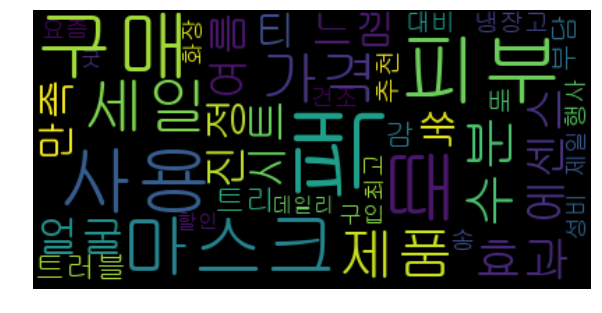

In [128]:
noun_cloud = build_cloud(noun_count, 40)
get_cloud(noun_cloud)

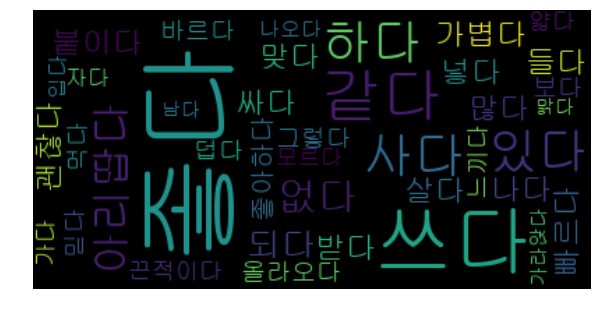

In [129]:
adjective_cloud = build_cloud(adjective_count, 40)
get_cloud(adjective_cloud)

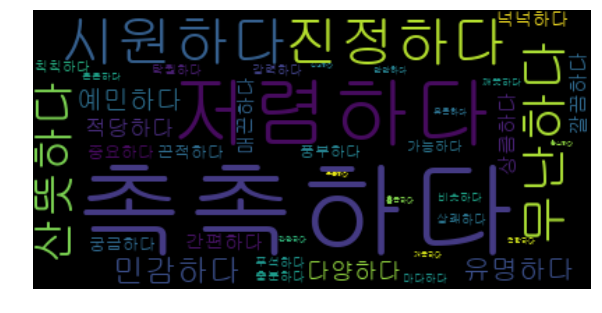

In [130]:
radix_cloud = build_cloud(radix_count, 40)
get_cloud(radix_cloud)